<a href="https://colab.research.google.com/github/FabioAntonioSiqueira/lia1_2024_1/blob/main/Entregas%20-%20F%C3%A1bio%20Siqueira/Aula_08_Construindo_um_modelo_com_TensorFlow_Cifar10ds.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


Projeto Ponta a Ponta - Construindo um Modelo com Tensorflow - Cifar-10
Problema: construir um modelo de Inteligência Artificial capaz de classificar imagens, considerando 10 categorias, sendo: airplane; automobile; bird; cat; deer; dog; frog; horse; ship; truck.

Não há mágica. Há matemática! 🧙




**Fonte de dados**

O conjunto de dados CIFAR-10 consiste em 60.000 imagens coloridas (32x32) em 10 classes, com 6.000 imagens por classe. Existem 50.000 imagens de treinamento e 10.000 imagens de teste.

In [2]:
# Importando o necessário
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image

**Carregando os dados de Treino e Teste**

In [3]:
# Carrega o dataset CIFAR-10 - Já está no Keras!
#(imagens_treino, labels_treino), (imagens_teste, labels_teste) = datasets.cifar100.load_data()
(imagens_treino, labels_treino), (imagens_teste, labels_teste) = datasets.fashion_mnist.load_data()

4422102/4422102 [==============================] - 1s 0us/step


In [4]:
#Classes das imagens
#nomes_classes = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
nomes_classes = [
        'T-shirt',
        'Trouser',
        'Pullover',
        'Dress',
        'Coat',
        'Sandal',
        'Shirt',
        'Sneaker',
        'Bag',
        'Ankle boot'
]

**Pré-processamento**

In [5]:
# Normaliza os valores dos pixels para que os dados fiquem na mesma escala
imagens_treino = imagens_treino / 255.0
imagens_teste = imagens_teste / 255.0

In [6]:
# Função para exibir as imagens
def visualiza_imagens(images, labels, class_names):
    plt.figure(figsize = (10,10))
    for i in range(25):
        plt.subplot(5, 5, i+1)
        plt.xticks([])
        plt.yticks([])
        plt.grid(False)
        plt.imshow(images[i], cmap= plt.cm.binary)
        plt.xlabel(nomes_classes[labels[i]])
    plt.show()

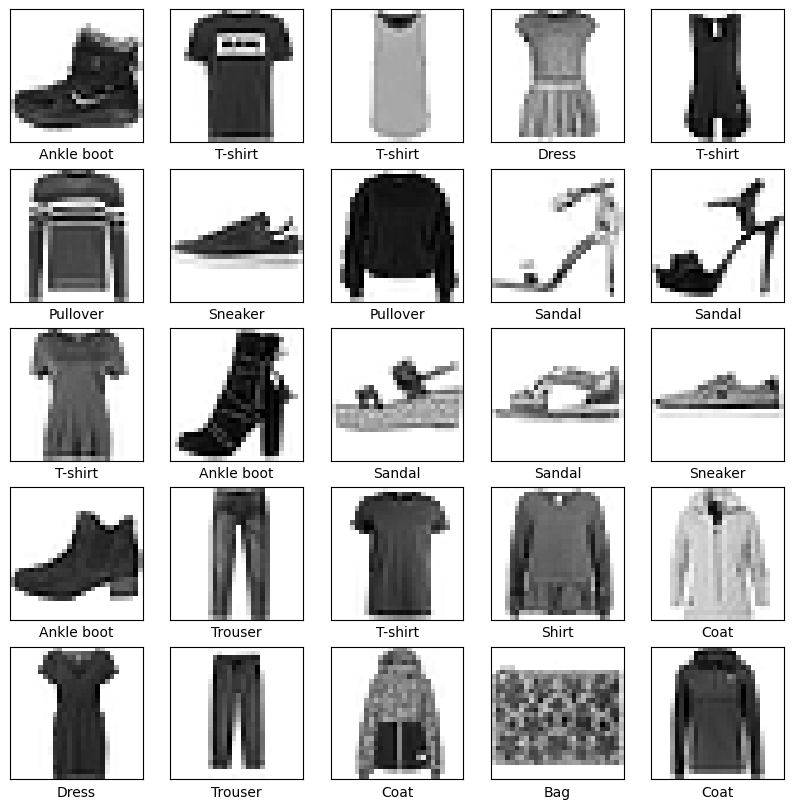

In [7]:
#Executa a função
visualiza_imagens(imagens_treino, labels_treino, nomes_classes)

**Construindo a Rede Neural Convolucional**

O Keras é uma biblioteca do TensorFlow.

In [8]:
# Arquitetura do Modelo -> Feature Learning

# Cria o objeto de sequência de camadas - do Keras
modelo_lia = models.Sequential()

# Adiciona a primeira camada de convolução e max pooling (camada de entrada)
modelo_lia.add(layers.Conv2D(28, (3, 3), activation = 'relu', input_shape = (28, 28, 1)))
modelo_lia.add(layers.MaxPooling2D((2, 2)))

# Adiciona a segunda camada de convolução e max pooling (camada intermediária)
modelo_lia.add(layers.Conv2D(64, (3, 3), activation = 'relu'))
modelo_lia.add(layers.MaxPooling2D((2, 2)))

# Adiciona a terceira camada de convolução e max pooling (camada intermediária)
modelo_lia.add(layers.Conv2D(64, (3, 3), activation = 'relu'))
modelo_lia.add(layers.MaxPooling2D((2, 2)))

In [9]:
# Adicionar camadas de classificação - Converte para um vetor - flatten
modelo_lia.add(layers.Flatten())
modelo_lia.add(layers.Dense(64, activation = 'relu'))
modelo_lia.add(layers.Dense(10, activation = 'softmax'))

In [10]:
# Compilação do modelo
modelo_lia.compile(optimizer = 'adam',
                   loss = 'sparse_categorical_crossentropy',
                   metrics = ['accuracy'])

# adam - é um algoritmo de aprendizagem tipo backpropagation!
# loss - função de erro. Isso se resume a uma otimização função matemática!
# metrics - medir o sucesso!

**Treinamento**

In [11]:
# Executando o treinamento
%%time
history = modelo_lia.fit(imagens_treino,
                         labels_treino,
                         epochs = 15,
                         validation_data = (imagens_teste, labels_teste))

Epoch 1/15
1875/1875 [==============================] - 13s 4ms/step - loss: 0.5888 - accuracy: 0.7880 - val_loss: 0.4565 - val_accuracy: 0.8391
Epoch 2/15
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3963 - accuracy: 0.8535 - val_loss: 0.4166 - val_accuracy: 0.8490
Epoch 3/15
1875/1875 [==============================] - 8s 4ms/step - loss: 0.3415 - accuracy: 0.8738 - val_loss: 0.3542 - val_accuracy: 0.8737
Epoch 4/15
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3064 - accuracy: 0.8867 - val_loss: 0.3479 - val_accuracy: 0.8709
Epoch 5/15
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2785 - accuracy: 0.8965 - val_loss: 0.3189 - val_accuracy: 0.8832
Epoch 6/15
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2559 - accuracy: 0.9041 - val_loss: 0.3102 - val_accuracy: 0.8882
Epoch 7/15
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2390 - accuracy: 0.9110 - val_loss: 0.3151 - val_accuracy

**Previsão - Testar o modelo (Deploy)**

Testar o modelo treinado com imagens que ele ainda não viu. Por fim, verificamos o resultado da previsão e emitimos a informação sobre a classe.

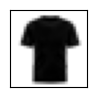

In [20]:
# Carrega uma nova imagem
nova_imagem = Image.open("/content/camiseta-preta.webp")

# Redimensiona para 28x28 pixels
# Converte para escala de cinza
nova_imagem = nova_imagem.convert('L')
nova_imagem = nova_imagem.resize((28, 28))

# Exibir a imagem
plt.figure(figsize = (1,1))
plt.imshow(nova_imagem, cmap='gray')  # Specify cmap='gray' to display grayscale image
plt.xticks([])
plt.yticks([])
plt.show()

In [21]:
#Converte a imagem para um array NumPy e normaliza
nova_imagem_array = np.array(nova_imagem) / 255.0

In [22]:
# Expande a dimensão do array para que ele tenha o formato (1, 32, 32, 3)
nova_imagem_array = np.expand_dims(nova_imagem_array, axis = 0)

In [23]:
# Fazendo a previsão!
previsoes = modelo_lia.predict(nova_imagem_array)

1/1 [==============================] - 0s 235ms/step


In [24]:
print(previsoes)

[[2.2514775e-01 6.8693942e-01 2.4511058e-02 9.6035546e-10 1.8874474e-04
  8.8334974e-07 9.9434927e-03 2.5578982e-08 5.3268678e-02 1.7484096e-11]]


In [25]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [26]:
#Obtém a classe com maior probabilidade e o nome da classe
classe_prevista = np.argmax(previsoes)
nome_classe_prevista = nomes_classes[classe_prevista]

In [ ]:
print("A nova imagem foi classificada como:", nome_classe_prevista)